Random Forest RMSE: 2.81
Random Forest R^2: 0.89


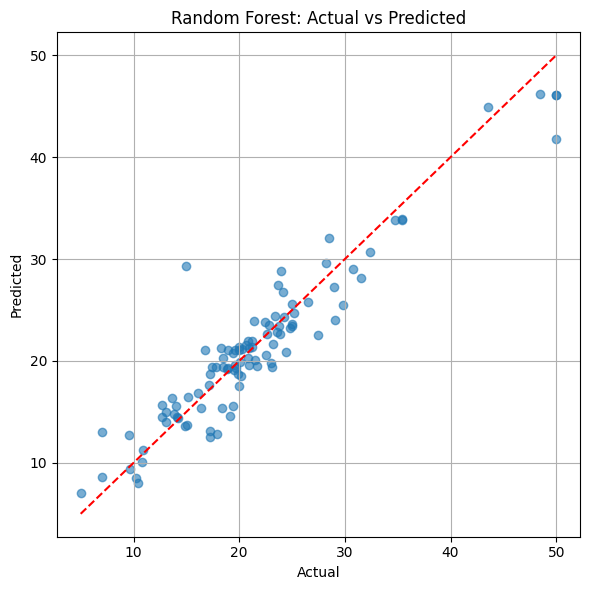

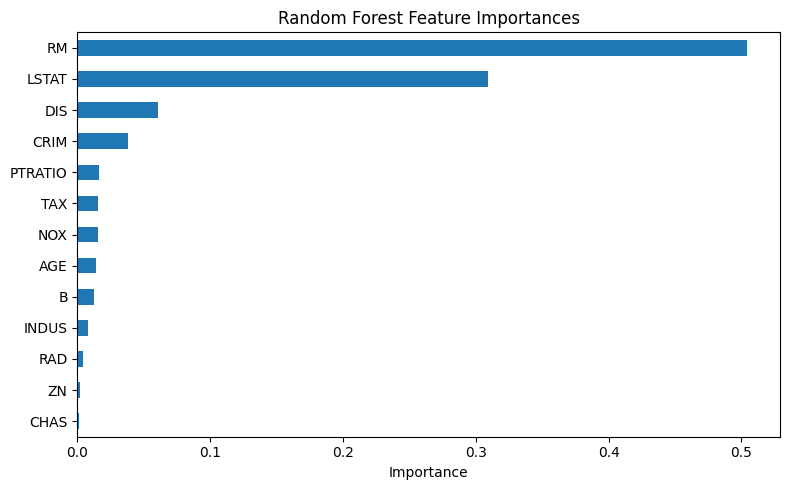

In [1]:
# 04d_post_model_analysis_rf.ipynb

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load test data
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

# Load Random Forest model
with open("rf_model.pkl", "rb") as f:
    rf = pickle.load(f)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R^2: {r2_rf:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X_test.columns)

plt.figure(figsize=(8, 5))
importances_rf.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
